<a href="https://colab.research.google.com/github/lnchamberlain/hello_world/blob/master/Copy_of_CNN_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

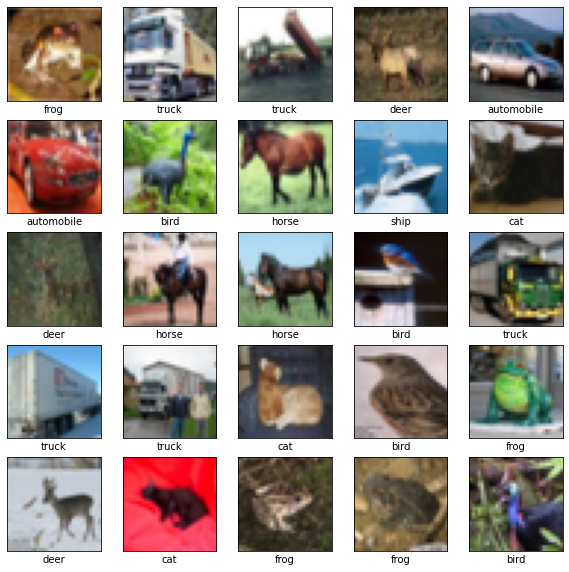

In [ ]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalization
train_images = train_images / 255
test_images = test_images / 255

# convertto one hot vector
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [ ]:
model = Sequential()
#2 convultion layers
# (3,3) is kernal size
# define input shape only
# 32 x 32 with 3 channels (rgb)
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu')),
# pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# dropout 30% of the neurons
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1048704   
                                                      

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=3,
                    validation_data=(test_images, test_labels))

Epoch 1/3
782/782 [==============================] - 188s 240ms/step - loss: 1.3599 - accuracy: 0.5110 - val_loss: 1.1432 - val_accuracy: 0.5931
Epoch 2/3
782/782 [==============================] - 188s 240ms/step - loss: 1.2389 - accuracy: 0.5595 - val_loss: 1.0484 - val_accuracy: 0.6344
Epoch 3/3
782/782 [==============================] - 189s 241ms/step - loss: 1.1531 - accuracy: 0.5918 - val_loss: 0.9824 - val_accuracy: 0.6541


Text(0.5, 1.0, 'Loss Curves')

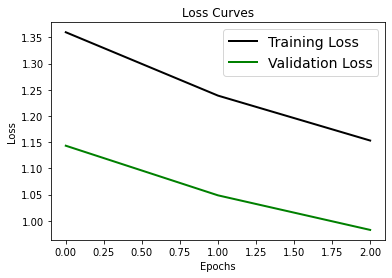

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [ ]:
#Predictions
pred = model.predict(test_images)
print(pred)
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 9s 30ms/step
[[3.2752552e-03 1.2888963e-03 2.8330056e-02 ... 7.9088202e-03
  2.5722193e-02 2.2606556e-03]
 [8.5810021e-02 5.1026404e-01 1.1833501e-05 ... 5.0959672e-09
  3.9646339e-01 7.4372306e-03]
 [1.5666734e-01 9.8962031e-02 5.3252289e-03 ... 5.1383447e-04
  6.7881775e-01 5.0758097e-02]
 ...
 [3.5411966e-04 9.1513093e-06 1.4117818e-01 ... 6.5041393e-02
  1.9465811e-05 4.1215135e-05]
 [4.5705024e-02 7.9551250e-01 1.4010563e-02 ... 5.0465739e-03
  1.8610442e-02 4.8282836e-02]
 [2.0539826e-04 1.2376626e-05 3.8841988e-03 ... 8.7071359e-01
  1.0688888e-06 4.6319296e-05]]
[3 1 8 ... 5 1 7]


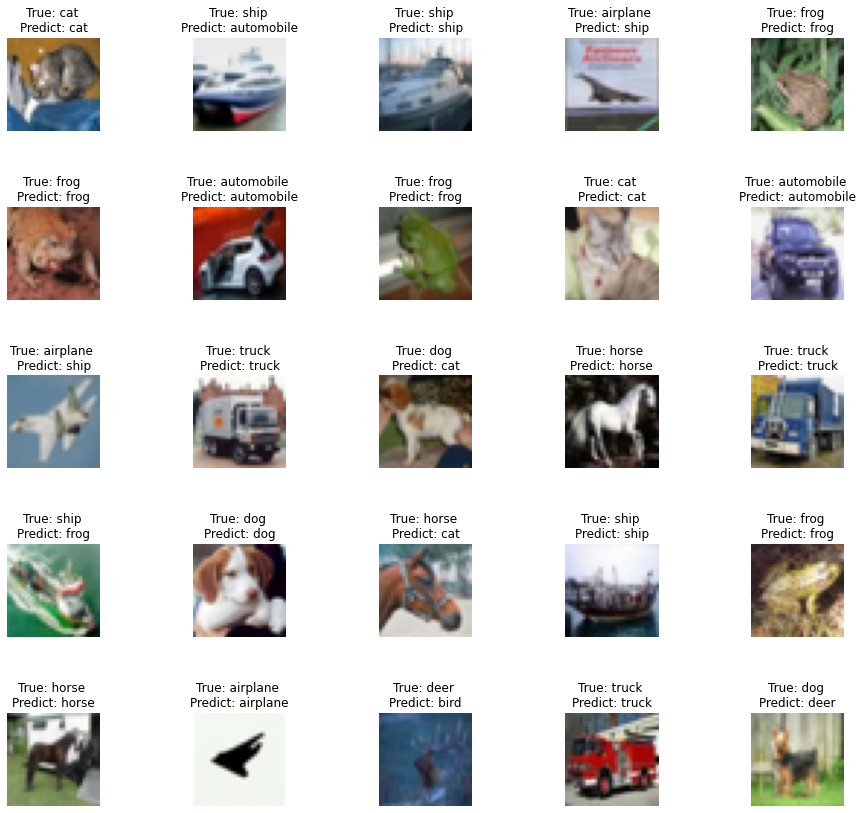

In [ ]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)